## Text Generation

*   Author- Tanjotveer Kaur

# Implementing Character-based RNN for Text Generation.

## PART-1

### Importing all the required libraries here.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Web scraping books from provided link for Gutenberg's website.

#### Book1 -The Importance of Being Earnest: A Trivial Comedy for Serious People (Oscare Wilde)

In [20]:
oscar_wilde_book1= "https://www.gutenberg.org/cache/epub/844/pg844.txt"
book1_file= tf.keras.utils.get_file("oscar_wilde.txt", oscar_wilde_book1)
with open(book1_file, encoding= "utf-8") as f:
    book1_txt= f.read()

#### Book 2 -Metamorphosis (Franz Kafka)

In [21]:
franz_kafka_book2= "https://www.gutenberg.org/cache/epub/5200/pg5200.txt"
book2_file= tf.keras.utils.get_file("franz_kafka.txt", franz_kafka_book2)
with open(book2_file, encoding= "utf-8") as f:
    book2_txt= f.read()

#### Book3 -Alice's Adventures in Wonderland (Lewis Carroll)

In [22]:
lewis_carroll_book3= "https://www.gutenberg.org/cache/epub/11/pg11.txt"
book3_file= tf.keras.utils.get_file("lewis_carroll.txt", lewis_carroll_book3)
with open(book3_file, encoding= "utf-8") as f:
    book3_txt= f.read()

### Cleaning the text.

#### Removing unnecessary header and footers from the actual text.

 * Starting of every gutenberg book->    \*** START OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST: ATRIVIAL COMEDY FOR SERIOUS PEOPLE \***
 * End ->  \n\nTHE END\n\n        \n            \*** END OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND \***\n

In [23]:
print("Start index-", book1_txt.find("FIRST ACT\n\n\nSCENE\n\nMorning-room in Algernon’s flat in Half-Moon Street."))
print("Ending index-", book1_txt.find("\n\n\n\n\n\n        \n            *** END OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST"))

Start index- 1802
Ending index- 118173


In [24]:
book1_txt= book1_txt[1802:118174]
book1_txt

'FIRST ACT\n\n\nSCENE\n\nMorning-room in Algernon’s flat in Half-Moon Street. The room is\nluxuriously and artistically furnished. The sound of a piano is heard\nin the adjoining room.\n\n[Lane is arranging afternoon tea on the table, and after the music has\nceased, Algernon enters.]\n\nALGERNON.\nDid you hear what I was playing, Lane?\n\nLANE.\nI didn’t think it polite to listen, sir.\n\nALGERNON.\nI’m sorry for that, for your sake. I don’t play accurately—any one can\nplay accurately—but I play with wonderful expression. As far as the\npiano is concerned, sentiment is my forte. I keep science for Life.\n\nLANE.\nYes, sir.\n\nALGERNON.\nAnd, speaking of the science of Life, have you got the cucumber\nsandwiches cut for Lady Bracknell?\n\nLANE.\nYes, sir. [Hands them on a salver.]\n\nALGERNON.\n[Inspects them, takes two, and sits down on the sofa.] Oh! . . . by the\nway, Lane, I see from your book that on Thursday night, when Lord\nShoreman and Mr. Worthing were dining with me, eight 

In [25]:
print("Start index-", book2_txt.find("I\n\n\nOne morning, when Gregor Samsa woke from troubled dreams, he found\n"))
print("Ending index-", book2_txt.find("\n\n\n\n\n\n        \n            *** END OF THE PROJECT GUTENBERG EBOOK METAMORPHOSIS"))

Start index- 952
Ending index- 119367


In [26]:
book2_txt= book2_txt[952:119368]
book2_txt

'I\n\n\nOne morning, when Gregor Samsa woke from troubled dreams, he found\nhimself transformed in his bed into a horrible vermin. He lay on his\narmour-like back, and if he lifted his head a little he could see his\nbrown belly, slightly domed and divided by arches into stiff sections.\nThe bedding was hardly able to cover it and seemed ready to slide off\nany moment. His many legs, pitifully thin compared with the size of the\nrest of him, waved about helplessly as he looked.\n\n“What’s happened to me?” he thought. It wasn’t a dream. His room, a\nproper human room although a little too small, lay peacefully between\nits four familiar walls. A collection of textile samples lay spread out\non the table—Samsa was a travelling salesman—and above it there hung a\npicture that he had recently cut out of an illustrated magazine and\nhoused in a nice, gilded frame. It showed a lady fitted out with a fur\nhat and fur boa who sat upright, raising a heavy fur muff that covered\nthe whole of her

In [27]:
print("Start index-", book3_txt.find("CHAPTER I.\nDown the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\n"))
print("Ending index-", book3_txt.find("\n\nTHE END\n\n        \n            *** END OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND"))

Start index- 1401
Ending index- 145408


In [28]:
book3_txt= book3_txt[1401:145409]
book3_txt

'CHAPTER I.\nDown the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into\nthe book her sister was reading, but it had no pictures or\nconversations in it, “and what is the use of a book,” thought Alice\n“without pictures or conversations?”\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure of\nmaking a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so _very_ remarkable in that; nor did Alice think it\nso _very_ much out of the way to hear the Rabbit say to itself, “Oh\ndear! Oh dear! I shall be late!” (when she thought it over afterwards,\nit occurred to her that she ought to have wondered at this, but at the\ntime it all seemed quite natural); but when the Rabbit actually _took

In [29]:
combined_book_txt= " ".join([book1_txt, book2_txt, book3_txt])
combined_book_txt

'FIRST ACT\n\n\nSCENE\n\nMorning-room in Algernon’s flat in Half-Moon Street. The room is\nluxuriously and artistically furnished. The sound of a piano is heard\nin the adjoining room.\n\n[Lane is arranging afternoon tea on the table, and after the music has\nceased, Algernon enters.]\n\nALGERNON.\nDid you hear what I was playing, Lane?\n\nLANE.\nI didn’t think it polite to listen, sir.\n\nALGERNON.\nI’m sorry for that, for your sake. I don’t play accurately—any one can\nplay accurately—but I play with wonderful expression. As far as the\npiano is concerned, sentiment is my forte. I keep science for Life.\n\nLANE.\nYes, sir.\n\nALGERNON.\nAnd, speaking of the science of Life, have you got the cucumber\nsandwiches cut for Lady Bracknell?\n\nLANE.\nYes, sir. [Hands them on a salver.]\n\nALGERNON.\n[Inspects them, takes two, and sits down on the sofa.] Oh! . . . by the\nway, Lane, I see from your book that on Thursday night, when Lord\nShoreman and Mr. Worthing were dining with me, eight 

### Create Text vectorization layer and split the text by character.

In [30]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809

#creating text vectorization object which will split text by character and make it lowercase.
text_vec_layer = tf.keras.layers.TextVectorization(split="character", standardize="lower")

#build vocabulary with tokens sorted by occurence count.
text_vec_layer.adapt([combined_book_txt]) 

#converting the text to sequences according to the vocabulary created.
encoded = text_vec_layer([combined_book_txt])[0]
print(encoded)

tf.Tensor([21  7 11 ... 10 23 14], shape=(378798,), dtype=int64)


### Getting number of unique tokens and the size of dataset after encoding it to sequence of indices.

In [31]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809

#number of unique tokens created out of the given text.- for model
num_tokens = text_vec_layer.vocabulary_size()
print(num_tokens)

#total size of given text after encoding to sequences of characters.
dataset_size = len(encoded)
print(dataset_size)

60
378798


### Creating tensorflow input pipeline.

In [34]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809

def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=100):
    
    #convert slices of array into python iterable object.
    dataset = tf.data.Dataset.from_tensor_slices(sequence)
    
    #cutting dataset(tensor) with each window having have size= length+1,i.e, 11 and each window is shifting by 1.
    #Each tensor contains single value.
    dataset = dataset.window(length+1, shift=1, drop_remainder=True)
    for i in dataset:
        print(i)
        break
    
    #Above opearation created dataset of windowed datasets (nested) so, using flat_map() to flatten it.
    #Each tensor wil have number of values= 'batch', ie., 11 values.
    dataset = dataset.flat_map(lambda window_ds: window_ds.batch(length+1))
    for i in dataset:
        print(i)
        break
    
    #Shuffling of dataset.
    if shuffle:
        
        #allocates buffer size 0f 100,000, to pick random enteries.
        dataset = dataset.shuffle(buffer_size=100_000, seed=seed)
        
        #takes 100 entries and makes a batch out of them.
        #groups the tensor to pass to the model as a batch.
        dataset = dataset.batch(batch_size)
       
    #shuffled windows.
    return dataset.map(lambda window: (window[:, :-1], window[:, 1:]))

### Splitting the datset into training, validation and testing sets.

In [35]:
#Getting index where first 80% of the dataset ends for splitting train and test.
train_test_split= round(0.8*dataset_size)
print(train_test_split)

#Getting index where 80% of the 'training' dataset ends for splitting train and valid sets.
train_valid_split= round(0.8*train_test_split)
print(train_valid_split)

303038
242430


In [36]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809

#setting window size,i.e, length of each sequence.
window_size = 10

#setting seed to repeat the randomization.
tf.random.set_seed(42)

#split into training and testing sets by 80:20 and then further splitting training for validation set by 80:20.
train_set = to_dataset(encoded[:train_valid_split], length= window_size, shuffle=True, seed=42)
valid_set = to_dataset(encoded[train_valid_split: train_test_split], length= window_size, shuffle=True, seed=42)
test_set = to_dataset(encoded[train_test_split:], length= window_size, shuffle=True, seed=42)



<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor([21  7 11 10  4  2  5 16  4 14 14], shape=(11,), dtype=int64)
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor([10 14  8  6  4  2 19  6  7  8 19], shape=(11,), dtype=int64)
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor([16  9  2 18  5 20  2 20  6 15  2], shape=(11,), dtype=int64)


### RNN model for character based text generation - (simpler than word-based).


In [37]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809


model = tf.keras.Sequential([
    #20 vector dimensions.
    tf.keras.layers.Embedding(input_dim=num_tokens, output_dim=20),
    tf.keras.layers.GRU(128, return_sequences=True),
    
    #neuron in o/p layer equal to num of unique tokens.
    tf.keras.layers.Dense(num_tokens, activation="softmax")
    ])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

#training for 20 epochs.
history = model.fit(train_set, validation_data=valid_set, epochs=20)


Epoch 1/20

2425/2425 [==============================] - 34s 11ms/step - loss: 2.1053 - accuracy: 0.3837 - val_loss: 2.0901 - val_accuracy: 0.4248
Epoch 2/20
2425/2425 [==============================] - 32s 11ms/step - loss: 1.6944 - accuracy: 0.4872 - val_loss: 2.0064 - val_accuracy: 0.4526
Epoch 3/20
2425/2425 [==============================] - 32s 11ms/step - loss: 1.6043 - accuracy: 0.5102 - val_loss: 1.9754 - val_accuracy: 0.4591
Epoch 4/20
2425/2425 [==============================] - 35s 12ms/step - loss: 1.5605 - accuracy: 0.5208 - val_loss: 1.9635 - val_accuracy: 0.4602
Epoch 5/20
2425/2425 [==============================] - 34s 12ms/step - loss: 1.5332 - accuracy: 0.5271 - val_loss: 1.9536 - val_accuracy: 0.4625
Epoch 6/20
2425/2425 [==============================] - 33s 12ms/step - loss: 1.5142 - accuracy: 0.5320 - val_loss: 1.9541 - val_accuracy: 0.4633
Epoch 7/20
2425/2425 [==============================] - 35s 12ms/step - loss: 1.5000 - accuracy: 0.5356 - val_loss: 1.9481

### Integrating model with text vectorization layer.

In [38]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809


final_model = tf.keras.Sequential([
    text_vec_layer,
    model
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          1200      
                                                                 
 gru (GRU)                   (None, None, 128)         57600     
                                                                 
 dense (Dense)               (None, None, 60)          7740      
                                                                 
Total params: 66540 (259.92 KB)
Trainable params: 66540 (259.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


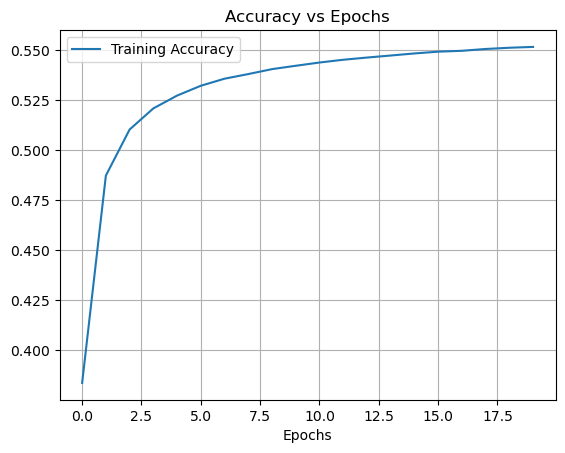

In [46]:
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.legend(loc='best')
plt.grid(True)
plt.show()

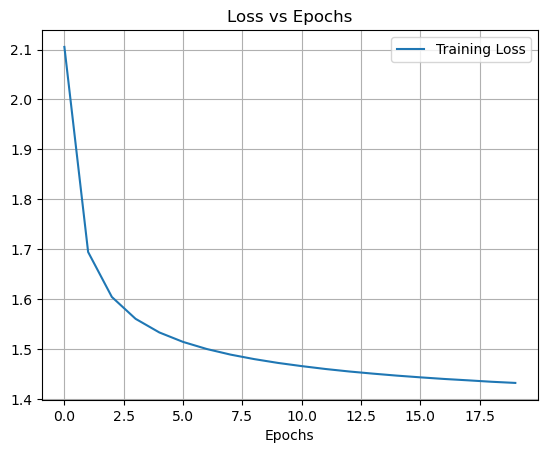

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [47]:
model.evaluate(test_set)

758/758 [==============================] - 6s 4ms/step - loss: 1.9461 - accuracy: 0.4669


[1.9461495876312256, 0.4668580889701843]

## PART-2

### Creating a function to predict next character.

In [48]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809

def next_char(text, temperature=1):
    
    #getting output of probabilities for the characters from model.
    y_proba = final_model.predict([text])[0, -1:]
    rescaled_logits = tf.math.log(y_proba) / temperature
    
    #randomly selecting an index for next char
    char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
    
    #getting character from the index number
    return text_vec_layer.get_vocabulary()[char_id]

### To predict 100 words approximately.

In [43]:
#Author: Miguel V. Martin,
#Date: January 2024
#Title: Using TF to Create Text
#Web address: https://learn.ontariotechu.ca/courses/26378/files/3748374?module_item_id=604809


#Temperature=1 for unpredictability of next character.
def extend_text(prompt, next_chars=1000, temperature=1):
    for _ in range(next_chars):
        prompt += next_char(prompt, temperature)
    return prompt

In [44]:
print(extend_text("The next day I bought this little ring", temperature=1))

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 73ms/step
The next day I bought this little ring back from his hot front of this?” as young lay, look; i happen of his undecultively, he had no bricks without deling hard the easing dark to weak on the peace in money need down.] oh, wish to
move my night
again. “it
had stard muffil right
the floor and the chest of still poor mrawknelf that i’m and him to could be position after the doorw of the
view fall go; and, ceock, with all overcoat-hot not long ventrying not
the good day away. thank you.

jack.
you discortsoll whates lower from mothers. gregor had been his frot
is uncle young least me, agazing five was ceramination may nothing of the
ever had shouted
the table, parsure,
but you’re alice
full and with his room, lifted to respectionate would not have other door seemed her completely he would not?” , look at this concriep and stuctly.] besides admiry he running
that on the shust
unthrew his father, sweek. she flew and the something her enoug

### Output-
The next day I bought this little ring back from his hot front of this?” as young lay, look; i happen of his undecultively, he had no bricks without deling hard the easing dark to weak on the peace in money need down.] oh, wish to
move my night
again. “it
had stard muffil right
the floor and the chest of still poor mrawknelf that i’m and him to could be position after the doorw of the
view fall go; and, ceock, with all overcoat-hot not long ventrying not
the good day away. thank you.

jack.
you discortsoll whates lower from mothers. gregor had been his frot
is uncle young least me, agazing five was ceramination may nothing of the
ever had shouted
the table, parsure,
but you’re alice
full and with his room, lifted to respectionate would not have other door seemed her completely he would not?” , look at this concriep and stuctly.] besides admiry he running
that on the shust
unthrew his father, sweek. she flew and the something her enough turnited to make ouch
with what had still, but short what estated to slow have the thing